<IPython.core.display.Javascript object>


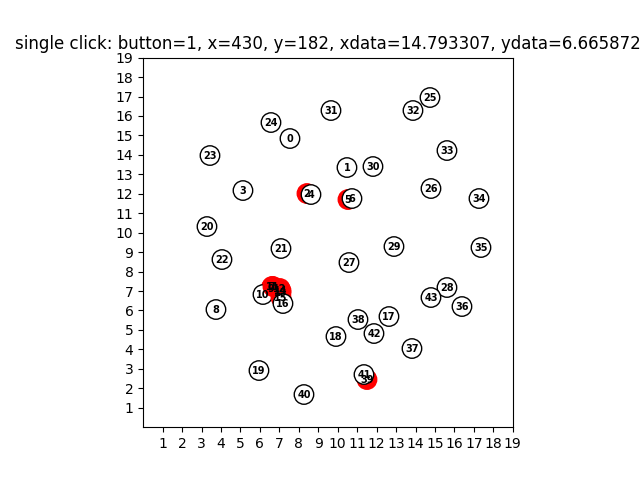

Output()

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import math
import ipywidgets as widgets
from matplotlib.patches import Circle
%matplotlib nbagg 

fig, ax = plt.subplots()
maxim_x = 20
maxim_y = 20
plt.xticks(range(1,maxim_x))
plt.yticks(range(1,maxim_y))
plt.gca().set_aspect('equal', adjustable='box')
out = widgets.Output()
i = 0 
circulos = dict()
@out.capture()
def onclick(event):
    global i
    ax.set_title('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))
    #si cae dentro de un circulo 
    for (_,(c,anot)) in circulos.items():
        x, y =  c.get_center() 
        r = c.get_radius() 
        if(math.sqrt((y - event.ydata)**2 + (x - event.xdata)**2)  <= r):  
            c.set(color = 'red')
    c = Circle((event.xdata,event.ydata),radius = 0.5,facecolor = 'white',edgecolor = 'black')
    ax.add_patch(c)
    anot = ax.annotate(str(i), (event.xdata, event.ydata),color='black', weight='bold', fontsize=7, ha='center', va='center')
    circulos[i] = (c,anot)
    i = i + 1 
    
display(out)
cid = fig.canvas.mpl_connect('button_press_event', onclick)